In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import mxnet as mx
from mxnet import nd, autograd, gluon
from jupyterthemes import jtplot
jtplot.style(theme='onedork', grid=False)

In [2]:
dataset = np.array([[2.7810836, 2.550537003, 0],
                    [1.465489372, 2.362125076, 0],
                    [3.396561688, 4.400293529, 0],
                    [1.38807019, 1.850220317, 0],
                    [3.06407232, 3.005305973, 0],
                    [7.627531214, 2.759262235, 1],
                    [5.332441248, 2.088626775, 1],
                    [6.922596716, 1.77106367, 1],
                    [8.675418651, -0.242068655, 1],
                    [7.673756466, 3.508563011, 1]])

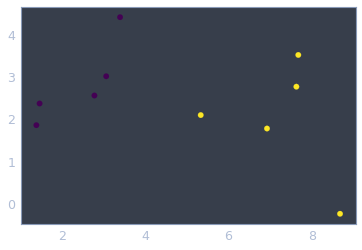

In [3]:
plt.scatter(dataset[:, 0], dataset[:, 1], c=dataset[:, 2])
plt.show()

In [4]:
def initialize_layer(num_features, num_hidden):
    weights = np.random.uniform(-0.1, 0.1, num_features * num_hidden).reshape((num_features, num_hidden))
    return weights

In [5]:
def sigmoid(weights, inputs):
    z = np.dot(inputs, weights)
    return 1 / (1 + np.exp(-z))

In [6]:
def sigmoid_derivative(weights, inputs):
    z = sigmoid(weights, inputs)
    return z * (1 - z)

In [7]:
def softmax_cross_entropy(y, y_hat):
    return -np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

In [8]:
def accuracy(y, y_hat):
    count = 0
    for i in range(len(y)):
        if y[i] == y_hat[i]:
            count += 1
    return count / len(y)

In [9]:
def forwark_propagate(network, inputs):
    outputs = []
    input_data = [inputs]
    outputs_derivative = []
    next_inputs = inputs
    for i in range(len(network)):
        input_data.append(np.dot(next_inputs, network[i]))
        output = sigmoid(network[i], next_inputs)
        output_d = sigmoid_derivative(network[i], next_inputs)
        outputs.append(output)
        outputs_derivative.append(output_d)
        next_inputs = output.copy()
    return outputs, outputs_derivative, input_data[:len(network)]

In [10]:
def backward_propagate(network, outputs, outputs_derivative, inputs, y_true):
    gradients = [1 for _ in range(len(network))]
    deltas = [1 for _ in range(len(network))]
    for i in reversed(range(len(network))):
        if i == len(network) - 1:
#             delta = y_true / outputs[i].flatten() - (1 - y_true) / (1 - outputs[i].flatten())
            delta = -(y_true - outputs[i].flatten())
            delta = delta.reshape(outputs[i].shape)
#             delta = outputs_derivative[i] * delta
            deltas[i] = delta
            gradient = np.dot(inputs[i].T, delta)
            gradients[i] = gradient
        else:
            delta = outputs_derivative[i] * np.dot(deltas[i + 1], network[i + 1].T)
            deltas[i] = delta
            gradient = np.dot(inputs[i].T, delta)
            gradients[i] = gradient
    return gradients

In [11]:
network = []
# network.append(initialize_layer(2, 1))
network.append(initialize_layer(2, 4))
network.append(initialize_layer(4, 1))

In [12]:
for epoch in range(20):
    output, output_d, inputs = forwark_propagate(network, dataset[:, :2])
    gradients = backward_propagate(network, output, output_d, inputs, dataset[:, 2])
    for i in range(len(network)):
        network[i] -= 0.1 * gradients[i]
    res = []
    for i in output[len(network) - 1]:
        if i < 0.5:
            res.append(0)
        else:
            res.append(1)
    print('Epoch %s, Accu %.2f%%' %(str(epoch), accuracy(dataset[:, 2], res)*100))

Epoch 0, Accu 50.00%
Epoch 1, Accu 50.00%
Epoch 2, Accu 50.00%
Epoch 3, Accu 50.00%
Epoch 4, Accu 50.00%
Epoch 5, Accu 60.00%
Epoch 6, Accu 60.00%
Epoch 7, Accu 90.00%
Epoch 8, Accu 100.00%
Epoch 9, Accu 100.00%
Epoch 10, Accu 100.00%
Epoch 11, Accu 100.00%
Epoch 12, Accu 100.00%
Epoch 13, Accu 100.00%
Epoch 14, Accu 100.00%
Epoch 15, Accu 100.00%
Epoch 16, Accu 100.00%
Epoch 17, Accu 100.00%
Epoch 18, Accu 100.00%
Epoch 19, Accu 100.00%
